<a href="https://colab.research.google.com/github/srkleon/DataScience/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import imdb


In [3]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [4]:
test_labels.shape

(25000,)

In [5]:
def vectorize_sequence(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i , sequence in enumerate(sequences ):
    results[i,sequence] = 1
  return results


In [6]:
train_data = vectorize_sequence(train_data)
test_data = vectorize_sequence(test_data)
train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')


In [7]:
train_labels.shape

(25000,)

In [8]:
x_train,x_val,y_train,y_val = train_test_split(train_data,train_labels,test_size=0.2)

In [9]:
y_train.shape , y_val.shape ,x_train.shape

((20000,), (5000,), (20000, 10000))

In [10]:
"""x_train = tf.Variable(x_train,dtype=tf.float32)
x_val   = tf.Variable(x_val,dtype=tf.float32)
y_train = tf.expand_dims(tf.Variable(y_train,dtype=tf.float32),axis=1)
y_val   = tf.expand_dims(tf.Variable(y_val,dtype=tf.float32),axis=1)
test_data   = tf.Variable(test_data,dtype=tf.float32)
test_labels   = tf.expand_dims(tf.Variable(test_labels,dtype=tf.float32),axis=1)"""

'x_train = tf.Variable(x_train,dtype=tf.float32)\nx_val   = tf.Variable(x_val,dtype=tf.float32)\ny_train = tf.expand_dims(tf.Variable(y_train,dtype=tf.float32),axis=1)\ny_val   = tf.expand_dims(tf.Variable(y_val,dtype=tf.float32),axis=1)\ntest_data   = tf.Variable(test_data,dtype=tf.float32)\ntest_labels   = tf.expand_dims(tf.Variable(test_labels,dtype=tf.float32),axis=1)'

In [11]:
x_train.shape , x_val.shape , test_data.shape ,test_labels.shape , y_train.shape  , y_val.shape

((20000, 10000), (5000, 10000), (25000, 10000), (25000,), (20000,), (5000,))

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(keras.layers.Dense(16,activation='tanh'))
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160577 (627.25 KB)
Trainable params: 160577 (627.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])


In [15]:
x_train.shape , y_train.shape , x_val.shape, y_val.shape

((20000, 10000), (20000,), (5000, 10000), (5000,))

In [16]:
history = model.fit(x_train,y_train,epochs= 20 ,batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/20
40/40 [==============================] - 3s 46ms/step - loss: 0.4915 - accuracy: 0.7921 - val_loss: 0.3941 - val_accuracy: 0.8324
Epoch 2/20
40/40 [==============================] - 2s 40ms/step - loss: 0.2741 - accuracy: 0.9014 - val_loss: 0.3175 - val_accuracy: 0.8690
Epoch 3/20
40/40 [==============================] - 2s 43ms/step - loss: 0.2023 - accuracy: 0.9269 - val_loss: 0.3027 - val_accuracy: 0.8814
Epoch 4/20
40/40 [==============================] - 2s 44ms/step - loss: 0.1615 - accuracy: 0.9428 - val_loss: 0.2916 - val_accuracy: 0.8872
Epoch 5/20
40/40 [==============================] - 2s 43ms/step - loss: 0.1311 - accuracy: 0.9563 - val_loss: 0.3073 - val_accuracy: 0.8880
Epoch 6/20
40/40 [==============================] - 2s 42ms/step - loss: 0.1128 - accuracy: 0.9628 - val_loss: 0.3880 - val_accuracy: 0.8660
Epoch 7/20
40/40 [==============================] - 1s 36ms/step - loss: 0.0928 - accuracy: 0.9716 - val_loss: 0.3646 - val_accuracy: 0.8786
Epoch 8/20
40

In [17]:
history_dict = history.history

In [18]:
model.evaluate(test_data,test_labels)

782/782 [==============================] - 3s 4ms/step - loss: 0.7673 - accuracy: 0.8570


[0.7673162221908569, 0.8570399880409241]

Plotting the Training and Validation loss

In [19]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

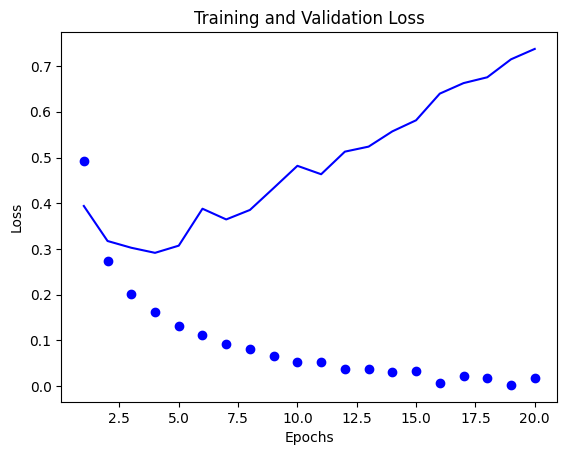

In [20]:
loss_values = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


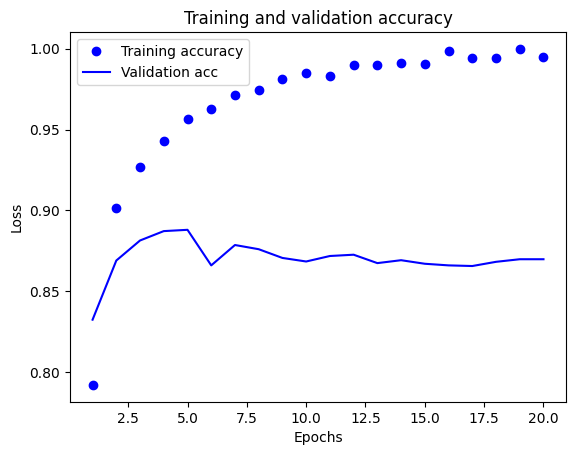

In [23]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()